In [64]:
#Import for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import API Requirements
import requests
import spotipy

#Import JSON
import json

#import SQL
import sqlalchemy
from sqlalchemy import create_engine

In [2]:
#Authentication variables
CLIENT_ID = '744aee4ee39a4b6787e645452d1d36b4'
CLIENT_SECRET = '7b72ec76041d4818b061e91ce613d780'

In [3]:
#Authenticate myself with a post request including the url and my creds
AUTH_URL = 'https://accounts.spotify.com/api/token'
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

In [4]:
#Print the response to my request
print(auth_response.status_code)

200


In [5]:
#convert the response, "auth_response" to json using .json()
auth_response_data = auth_response.json()

In [7]:
#pull the access token from the response and save it in a variable "access_token"
access_token = auth_response_data['access_token']

In [8]:
#save the token to the API to use in my GET request headers
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [9]:
#Access endpoints base URL for spotify
BASE_URL = 'https://api.spotify.com/v1/'

In [10]:
#Variables for artist data I want to collect, artist-ids
lil_baby = '5f7VJjfbwm532GiveGC0ZK'
drake = '3TVXtAsR1Inumwj472S9r4'
lil_uzi_vert = '4O15NlyKLIASxsJ0PrXPfz'

In [11]:
#do a GET request. Specify the url & the headers set for authentication
#you can input parameters (params=) as to what limits you want on the json file that will be returned to you
r = requests.get(BASE_URL + 'artists?ids=' + lil_baby + "," + drake + "," + lil_uzi_vert, headers = headers)

In [101]:
#convert whatever is returned into JSON
d = r.json()


d

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5f7VJjfbwm532GiveGC0ZK'},
   'followers': {'href': None, 'total': 7567982},
   'genres': ['atl hip hop', 'atl trap', 'rap', 'trap'],
   'href': 'https://api.spotify.com/v1/artists/5f7VJjfbwm532GiveGC0ZK',
   'id': '5f7VJjfbwm532GiveGC0ZK',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab6761610000e5eb2161ef3bab0e5e922a1c297d',
     'width': 640},
    {'height': 320,
     'url': 'https://i.scdn.co/image/ab676161000051742161ef3bab0e5e922a1c297d',
     'width': 320},
    {'height': 160,
     'url': 'https://i.scdn.co/image/ab6761610000f1782161ef3bab0e5e922a1c297d',
     'width': 160}],
   'name': 'Lil Baby',
   'popularity': 95,
   'type': 'artist',
   'uri': 'spotify:artist:5f7VJjfbwm532GiveGC0ZK'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
   'followers': {'href': None, 'total': 55780066},
   'genres': ['canadian hip hop',
    'canadian pop',


In [102]:
for artist in d['artists']:
    for key in artist:
        print(key)
    

SyntaxError: invalid syntax (<ipython-input-102-993a20c2eb59>, line 2)

In [53]:
for artist in d['artists']:
    print("Artist:", artist['name'])
    print("Popularity:",artist['popularity'])
    print("Genres:", artist['genres'])
    for key in artist['followers']:
        if key == "total":
            print("Followers:", artist['followers'][key])
    print("-----")

Artist: Lil Baby
Popularity: 95
Genres: ['atl hip hop', 'atl trap', 'rap', 'trap']
Followers: 7567982
-----
Artist: Drake
Popularity: 98
Genres: ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']
Followers: 55780066
-----
Artist: Lil Uzi Vert
Popularity: 91
Genres: ['melodic rap', 'philly rap', 'rap', 'trap']
Followers: 11684670
-----


In [49]:
followers = []
rappers = []
popularity = []

In [50]:
for artist in d['artists']:
    rappers.append(artist['name'])
    popularity.append(artist['popularity'])
    for key in artist['followers']:
        if key == 'total':
            followers.append(artist['followers'][key])
            
print(rappers)
print(popularity)
print(followers)

['Lil Baby', 'Drake', 'Lil Uzi Vert']
[95, 98, 91]
[7567982, 55780066, 11684670]


<BarContainer object of 3 artists>

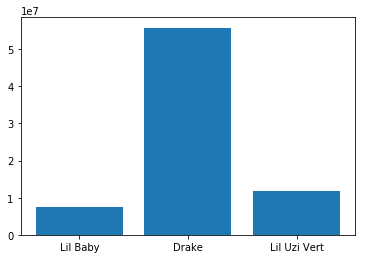

In [52]:
plt.bar(rappers, followers)

In [58]:
type(d)

dict

In [174]:
rows=[]
for artist in d['artists']:
    artistData = []
    artistData.append(artist['name'])
    artistData.append(artist['genres'][0:2])
    artistData.append(artist['popularity'])
    for key in artist['followers']:
        if key == 'total':
            artistData.append(artist['followers'][key])
    rows.append(artistData)
    
pd.DataFrame(rows, columns=['Name', 'Genres', 'Popularity', 'Followers']).head()

,Name,Genres,Popularity,Followers
0,Lil Baby,"[atl hip hop, atl trap]",95,7567982
1,Drake,"[canadian hip hop, canadian pop]",98,55780066
2,Lil Uzi Vert,"[melodic rap, philly rap]",91,11684670
